## BREAST CANCER CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

DATA PRE-PROCESSING

In [2]:
data=pd.read_csv('breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


Numeric labelling and dropping unnecessary columns

In [4]:
data=data.drop(["id"], axis=1)
m_index=data.loc[data["diagnosis"] == "M"].index
b_index=data.loc[data["diagnosis"] == "B"].index

data["diagnosis"].loc[m_index] = 1
data["diagnosis"].loc[b_index] = -1

data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
data.shape

(569, 31)

there are 569 rows and 33 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
data.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [8]:
# checking if there are any nulls in any columns
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
target=data["diagnosis"]
target

0       1
1       1
2       1
3       1
4       1
       ..
564     1
565     1
566     1
567     1
568    -1
Name: diagnosis, Length: 569, dtype: object

In [10]:
data['diagnosis'].value_counts()

diagnosis
-1    357
1     212
Name: count, dtype: int64

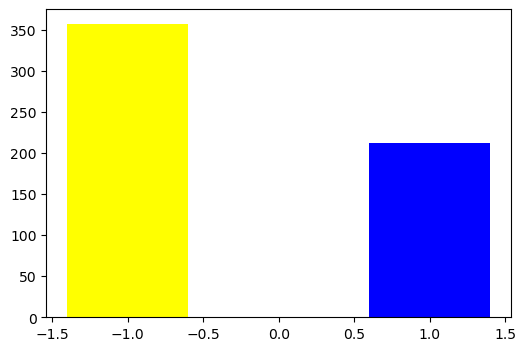

In [11]:
plt.figure(figsize=(6,4))
plt.bar(data['diagnosis'].value_counts().keys(),data['diagnosis'].value_counts(),color=['yellow', 'blue'])
plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

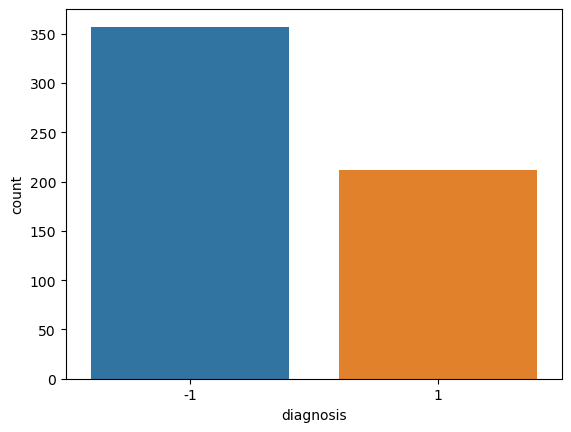

In [12]:
sns.countplot(data['diagnosis'], label = "Count") 

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

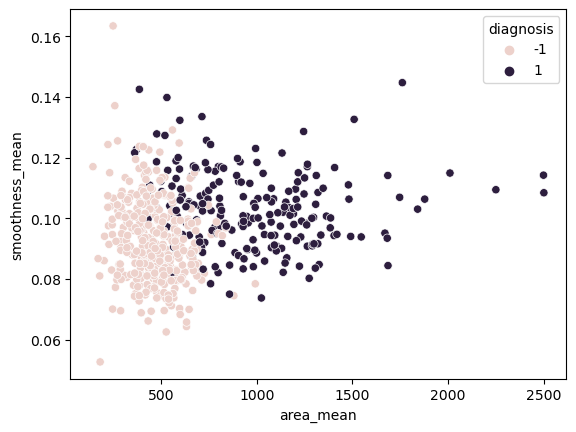

In [13]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = data)

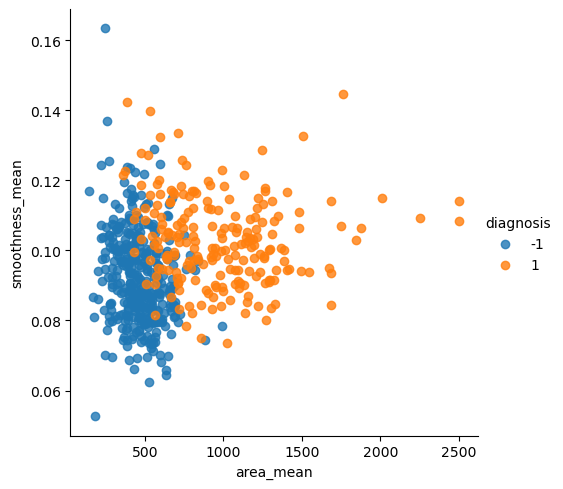

In [14]:
sns.lmplot('area_mean', 'smoothness_mean', hue ='diagnosis', data = data, fit_reg=False)

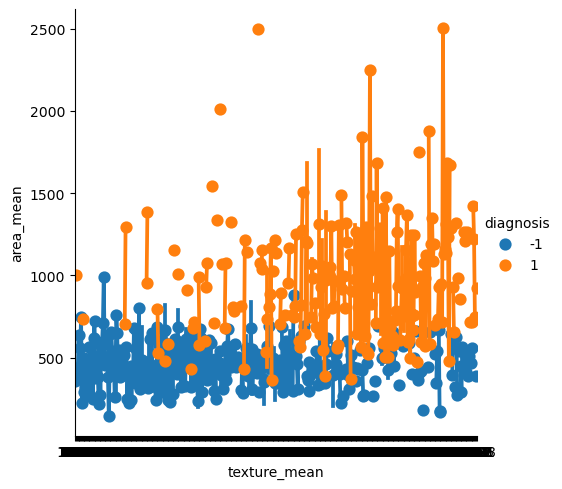

In [15]:
sns.factorplot('texture_mean','area_mean',hue='diagnosis',data=data)

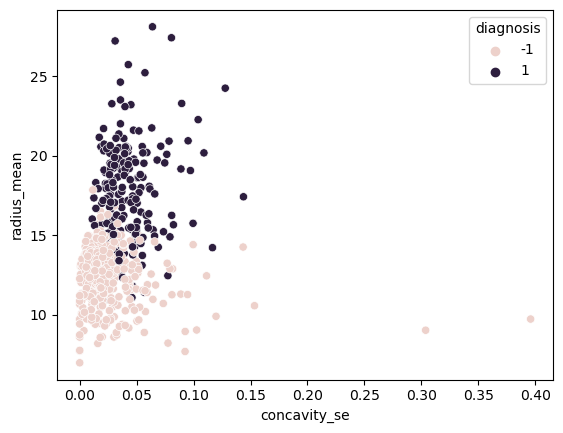

In [16]:
sns.scatterplot('concavity_se', 'radius_mean', hue ='diagnosis', data = data);

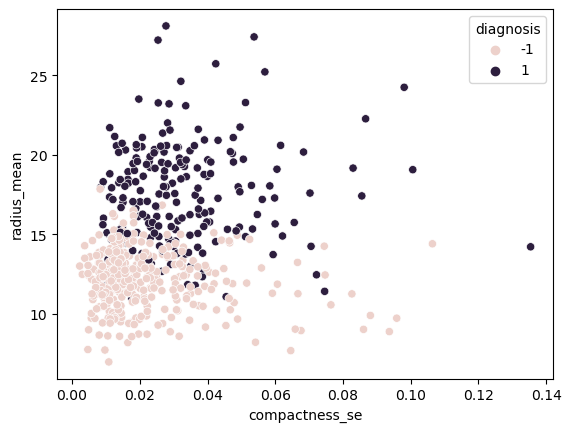

In [17]:
sns.scatterplot('compactness_se', 'radius_mean', hue ='diagnosis', data = data);

In [18]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data.iloc[:,1]=encoder.fit_transform(data.iloc[:,1].values)

In [21]:
data.iloc[:,1]

0      370.0
1      426.0
2      406.0
3       98.0
4      418.0
       ...  
564    438.0
565    413.0
566    340.0
567    429.0
568      3.0
Name: radius_mean, Length: 569, dtype: float64

In [22]:
data.iloc[:,1:14].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se
radius_mean,1.000000,0.320300,0.955775,0.910346,0.141000,0.484586,0.625013,0.769447,0.130026,-0.336386,0.574776,-0.146902,0.568727
texture_mean,0.320300,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673
perimeter_mean,0.955775,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135
area_mean,0.910346,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628
smoothness_mean,0.141000,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092
compactness_mean,0.484586,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905
concavity_mean,0.625013,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391
concave points_mean,0.769447,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650
symmetry_mean,0.130026,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893
fractal_dimension_mean,-0.336386,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830


<AxesSubplot:>

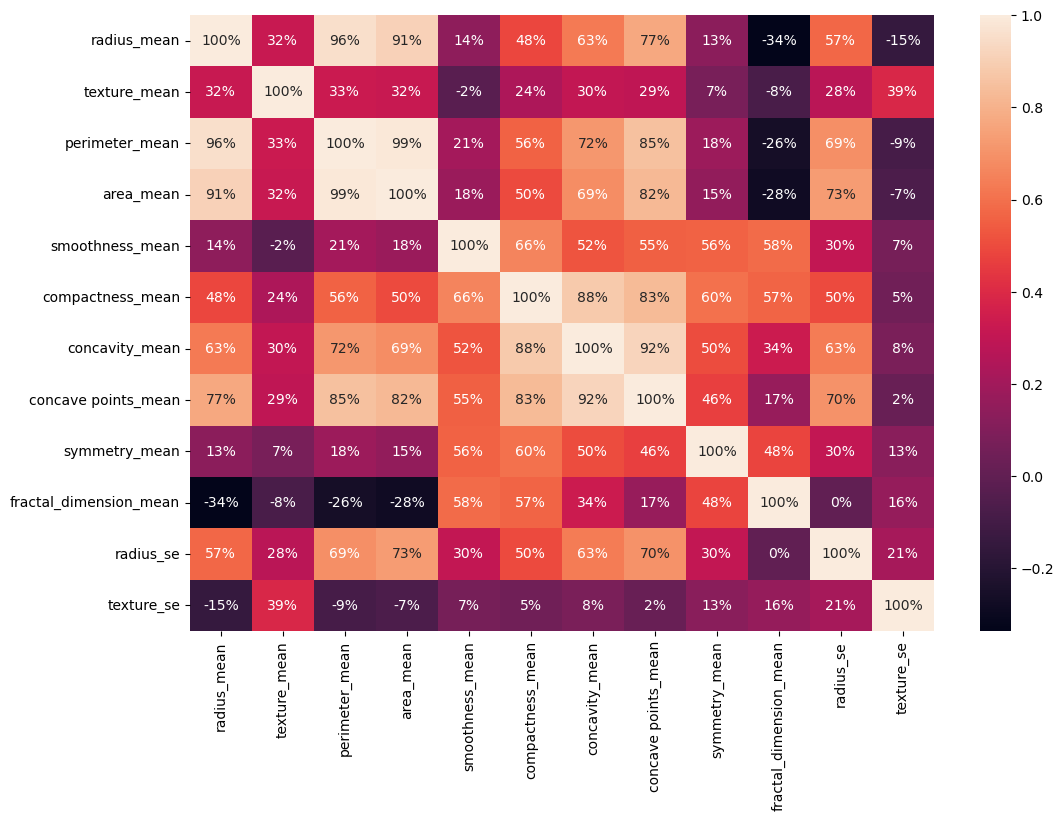

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(data.iloc[:,1:13].corr(),annot=True,fmt='.0%')

In [24]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) 
kmeans_labels = kmeans.fit_predict(data)
ari = adjusted_rand_score(target,kmeans_labels)
print(ari)

0.49142453622455523


In [25]:
from sklearn import metrics
clusters=[2,3,4,5,6,7]
#test different numbers of clusters
for n_clusters in clusters:
    estimator = KMeans(n_clusters=n_clusters)
    estimator.fit(data)
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(target, estimator.labels_)))

Number of Clusters: 2
Inertia: 81848603.62524417
Homogeneity: 0.42229071246999117
Number of Clusters: 3
Inertia: 50787780.97724786
Homogeneity: 0.4615490603114571
Number of Clusters: 4
Inertia: 30578863.266523506
Homogeneity: 0.5671017282286929
Number of Clusters: 5
Inertia: 21614126.447936483
Homogeneity: 0.6006094900844907
Number of Clusters: 6
Inertia: 17322370.36457076
Homogeneity: 0.6199268577635567
Number of Clusters: 7
Inertia: 13891554.375978926
Homogeneity: 0.6189066839766104


In [26]:
#Hierachical Clustering(CAH)
from sklearn.cluster import AgglomerativeClustering
cah = AgglomerativeClustering(n_clusters=5)  
cah_labels=cah.fit_predict(data)
ari = adjusted_rand_score(target, cah_labels)
print(ari)

0.424611805964058


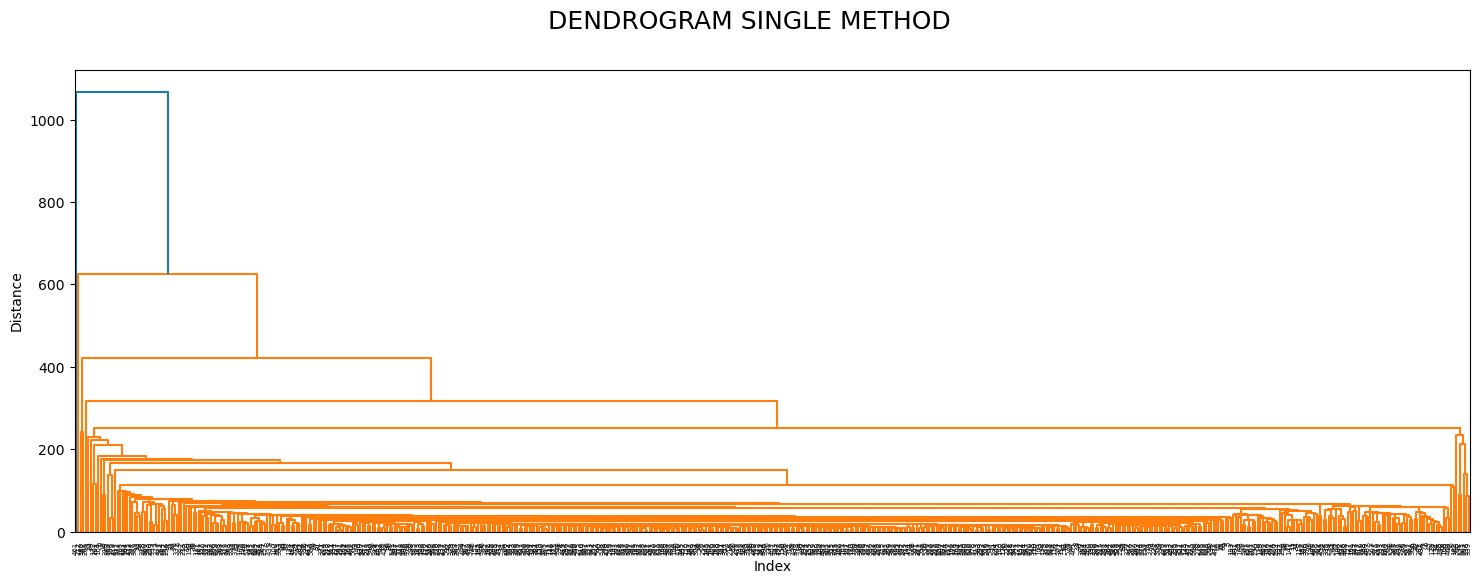

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
dist_sin = linkage(data.loc[:,["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]],method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [28]:
X = data.iloc[:,2:31].values
y = data.iloc[:,1].values

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.22065727699530516

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)

1.0

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train)

1.0

In [33]:
from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test,dtc.predict(X_test))
cm = confusion_matrix(y_test,rfc.predict(X_test))

cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
print('accuracy=',(86+52)/(86+4+1+52))

accuracy= 0.965034965034965


96% accuracy and precision to detect malignant or benign breast cancer, and below there is prediction of rfc(random forest classifier) of X_test and y_test.

In [35]:
prediction = rfc.predict(X_test)
prediction

array([201., 175., 246., 246., 162., 104., 127.,  76.,  25.,  40., 159.,
       226.,  60., 374., 362., 285.,  17., 419., 399., 432., 159., 338.,
       179., 123., 425., 271., 135., 179., 246., 387., 160., 421., 190.,
       318.,  71., 201., 186., 423., 294., 350., 175.,  22., 357.,  56.,
       179., 428.,   0., 244., 126., 353., 317., 338., 376.,  77., 164.,
        76.,  79.,  83., 175., 402., 312., 311.,  81., 174., 259., 122.,
       451., 365., 396.,  43., 248., 240.,  72., 289., 439., 172.,   9.,
       128., 138.,  38., 225., 317., 179., 153., 338., 139., 195.,   9.,
       280., 370.,  53., 284., 296., 290.,  38.,  30., 313., 201., 131.,
       100.,  44., 157., 242., 244., 384.,  33., 290., 233., 246.,  15.,
       181., 399., 399., 411.,  50., 128., 294., 122., 144., 274., 122.,
       174., 160.,  73., 292., 121., 274.,  97.,  30.,  63., 355.,  38.,
       195., 321.,  75., 320., 218., 301., 448.,  64., 157., 320., 425.])

In [36]:
y_test

array([211., 203., 250., 260., 194.,  94., 137., 118.,   2.,  53., 281.,
       278.,  23., 345., 279., 312.,  18., 424., 403., 433., 125., 332.,
       216., 125., 437., 130.,  70., 234., 211., 385., 178., 426., 198.,
       330.,  37., 170., 205., 389., 288., 300., 303.,  13., 324.,  55.,
       204., 438.,  10., 251., 124., 273., 394., 288., 378., 109., 160.,
       102.,  92., 149., 142., 441., 237., 326.,  80., 182., 363., 136.,
       443., 359., 427.,  27., 266., 328., 106., 276., 383., 192.,   6.,
       195., 114.,  12., 340., 415., 322., 158., 325., 152., 219.,   4.,
       352., 429.,  28., 302., 295., 305.,  24.,  43., 314., 184., 108.,
        99.,  14., 154., 294., 253., 379.,  20., 367., 183., 316., 358.,
       173., 415., 377., 297.,  46.,  66., 329., 142., 148., 206., 120.,
       169., 258.,  87., 416., 111., 263.,  89.,  53.,  68., 371.,  47.,
       202., 197.,  90., 107., 283., 298., 445.,  59., 153., 221., 404.])

### Conclusion

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone.
+ Here, building the classification models to predict whether the cancer type is Malignant or Benign.
+ The accuracy is 96% from RandomForestClassifier(rfc)

## Thank you